<a href="https://colab.research.google.com/github/santiagoahl/medical-cost-prediction/blob/main/medical_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost prediction from US Census Bureau
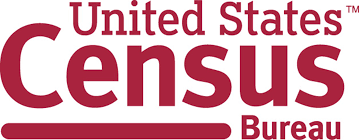

A linear regression model built to predict patient's medical costs.

>[Medical Cost prediction from US Census Bureau](#scrollTo=gokSwPTElq7N)

>>[About the data](#scrollTo=44hrN3vmlMpy)

>>>[Context](#scrollTo=44hrN3vmlMpy)

>>>[Content](#scrollTo=44hrN3vmlMpy)

>>>[Acknowledgements](#scrollTo=44hrN3vmlMpy)

>>[Purpose](#scrollTo=44hrN3vmlMpy)

>>[Methodology](#scrollTo=44hrN3vmlMpy)

>>[Results](#scrollTo=44hrN3vmlMpy)

>[Library import](#scrollTo=0ofKknFplMp5)

>[Data import](#scrollTo=WC11x0i-lMp9)

>[Data processing](#scrollTo=obI52-yXlMp-)

>>[Correlation analysis](#scrollTo=RcYgn3yrp_HO)

>>[One Hot encoding](#scrollTo=EGH00m2HqCni)

>>[Data analysis conclusions](#scrollTo=NSn6cRKBxU8u)

>[Modeling](#scrollTo=ixENQ9J2zTPL)

>>[Training](#scrollTo=Ve5p-SKWzUe2)

>>[Testing](#scrollTo=tWKcfwg-zXBd)

>[Results](#scrollTo=8RYsR3lTzYVk)

>>[Residuals](#scrollTo=8b-Kfo8zNkpx)

>[References](#scrollTo=SxUkIBrRlMp-)



## About the data

Data is collected from this Kaggle source [Medical Cost Personal Datasets
](https://www.kaggle.com/datasets/mirichoi0218/insurance)

### Context
The United States Census Bureau (USCB), officially the Bureau of the Census, is a principal agency of the U.S. Federal Statistical System, responsible for producing data about the American people and economy. The Census Bureau is part of the U.S. Department of Commerce and its director is appointed by the President of the United States.
### Content

`age`: age of primary beneficiary

`sex`: insurance contractor gender, female, male

`bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

`children`: Number of children covered by health insurance / Number of dependents

`smoker`: Smoking

`region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

`charges`: Individual medical costs billed by health insurance

### Acknowledgements
The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets).

## Purpose

Our purpose is to analyze the relation between some patient's features such like its age or wheter they are smoker or not. After that we will predict new patient's costs from its features.

## Methodology
We desire to build an optimal model using linear regression with the machine lerning python library: `scikit.learn`.

## Results
- We founded a high correlation between smoking and patient's medical costs.
- We got a $R^2$ score of $86.7$% from our predictions.

# Library import
We import all the required Python libraries

In [ ]:
!pip install regressors

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
# Data manipulation
import pandas as pd
import numpy as np


# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sns.set(style='whitegrid',context='notebook')

#Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

 #Metrics
from sklearn.metrics import mean_squared_error, r2_score 


# Data import
We retrieve all the required data for the analysis.

Note: If you want to run the model, you should follow these steps:

1. Download the data [Here](https://www.kaggle.com/datasets/mirichoi0218/insurance/download?datasetVersionNumber=1).

2.  Unzip your data with `WinRar`.

3. Upload your data by dragging it on files colab section.
4. Run this instead the following cell:
`df = pd.read_csv(/archive/insurance.csv)`

In [115]:
df = pd.read_csv('/content/drive/MyDrive/cursos_platzi/linear-regression-sklearn/archive/insurance.csv')

# Data processing


In [116]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
df.shape

(1338, 7)

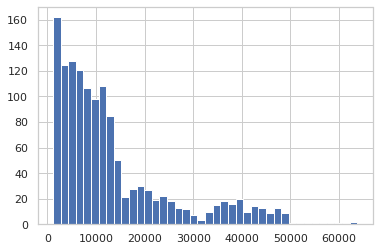

In [118]:
df.charges.hist(bins=40)

We observed a gap between charges of 50000 and 60000. So we should look for outliers from Inter Quantile Ranges:

In [119]:
def detect_otliers(x):
    Q3 = df[x].quantile(0.75)
    Q1 = df[x].quantile(0.25)
    IQR = Q3 - Q1
    superior = Q3 + (1.5 * IQR)
    inferior = Q1 - (1.5 * IQR)
    out_sup = df[df[x] > superior].index
    out_inf = df[df[x] < inferior].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    
    size = len(outliers)
        
    return print(f'There are {size} outliers in the variable {x},and they correspond to the indices: {outliers} \n'), outliers

m, a = detect_otliers('bmi')
m, b = detect_otliers('charges')
print('Clear outliers are detected in indices ', list(set(a) & set(b)))

There are 9 outliers in the variable bmi,and they correspond to the indices: [116, 286, 401, 543, 847, 860, 1047, 1088, 1317] 

There are 139 outliers in the variable charges,and they correspond to the indices: [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323] 

Clear outliers are detected in indices  [860, 543, 1047]


In [120]:
df[df['charges']>=50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


We are going to delete this outliers in order to improve the bias.

In [121]:
df = df[df['charges']<=50000]

## Correlation analysis

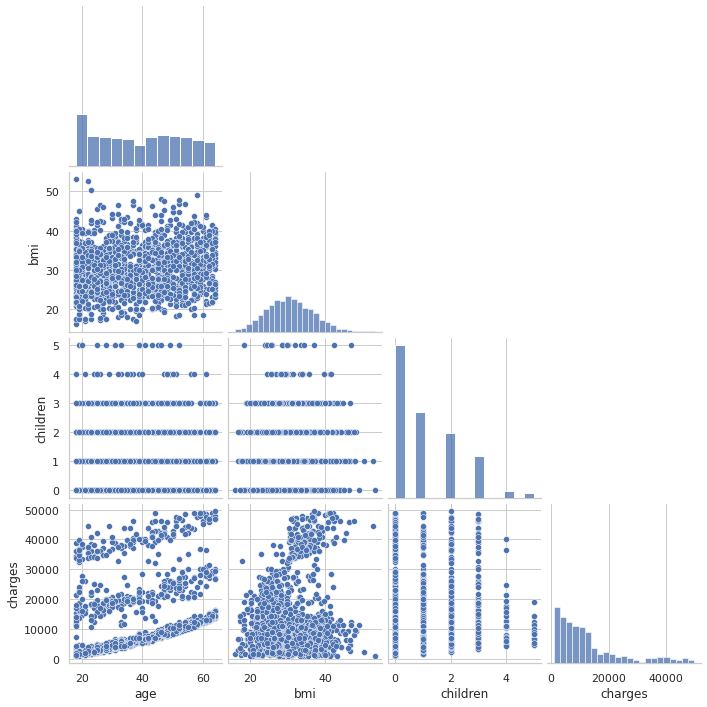

In [122]:
sns.pairplot(df, height=2.5, corner=True)
plt.show()

Now we are going to view the correlation matrix with a heat map.

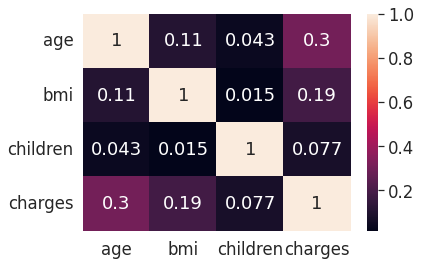

In [123]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)  # Correlation coeffientes
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)
plt.show()

## One Hot encoding

In [124]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


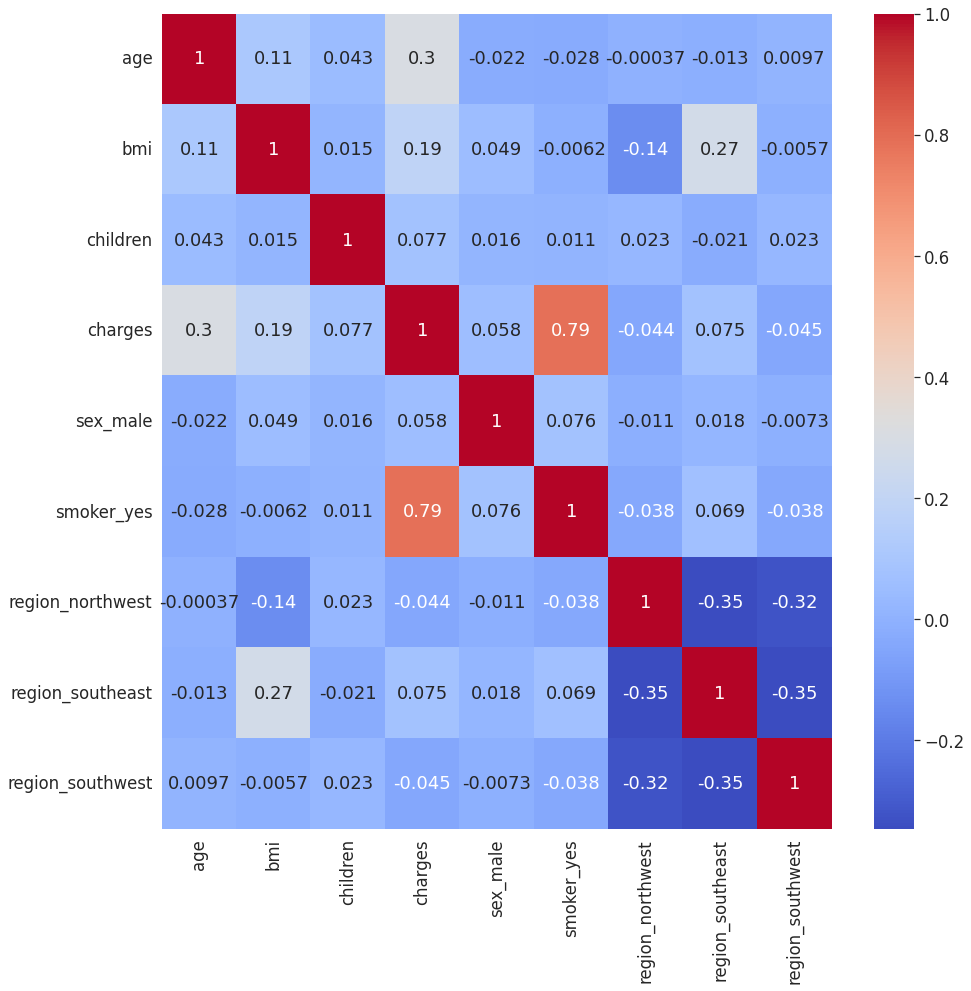

In [125]:
cols = ['age', 'bmi', 'children', 'charges', 'smoker', 'sex', 'region']
cm = np.corrcoef(df.values.T)  # Correlation coeffientes
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap='coolwarm',annot=True, yticklabels=df.columns, xticklabels=df.columns)
plt.show()

## Data analysis conclusions

- We've founded a high correlation between the amount of charge and being a smoker.
- The high correlation between being smoker and charges increases when patient has a high age or high bmi.

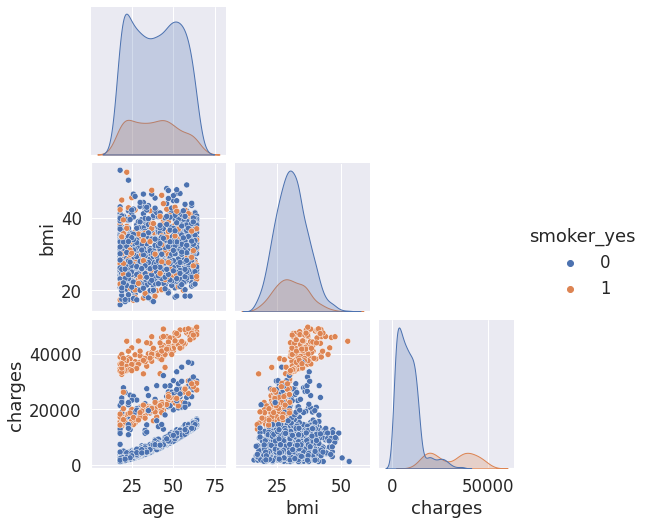

In [126]:
plot_cols = ['age', 'bmi', 'charges', 'smoker_yes']
sns.pairplot(df[plot_cols], height=2.5, corner=True, hue='smoker_yes')
plt.show()

# Modeling

We are going to add or modify features in order to improve our model.

In [168]:
df['age'] = df.age ** 2
df['overweight'] = (df.bmi >= 30).astype(int)
df['OW_and_Smoke'] = df.overweight * df.smoker_yes

In [178]:
# Cast Data to Numpy

X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

In [179]:
# Dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [180]:
# Data nomalization

 # Scaler
sc_x = StandardScaler().fit(X_train)
sc_y = StandardScaler().fit(y_train)

 # Transformations

X_train, X_test, y_train, y_test = sc_x.transform(X_train), sc_x.transform(X_test), sc_y.transform(y_train), sc_y.transform(y_test)

## Training

In [184]:
# Model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Testing

In [185]:
# Metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(' r2: ', r2.round(4), '\n MSE: ', mse.round(4))

 r2:  0.8674 
 MSE:  0.1504


# Results

In [186]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [187]:
y_test = y_test.reshape(-1)

print('='*24,' Summary ', '='*24)
stats.summary(model, X_test, y_test, X_cols)

========================  Summary  ========================
Residuals:
    Min    1Q  Median     3Q    Max
-2.0322 0.016   0.095 0.1582 0.5268


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.000000    0.021523  -0.0000  1.000000
overweight       -0.044598    0.033959  -1.3133  0.189994
OW_and_Smoke      0.493898    0.029020  17.0191  0.000000
region_southwest -0.052245    0.025884  -2.0184  0.044349
age               0.317768    0.020570  15.4480  0.000000
bmi               0.057015    0.035607   1.6012  0.110274
smoker_yes        0.473990    0.030941  15.3192  0.000000
children          0.087779    0.022354   3.9267  0.000105
sex_male         -0.021836    0.021473  -1.0169  0.309935
region_southeast -0.041407    0.025102  -1.6495  0.099985
region_northwest -0.015760    0.023917  -0.6589  0.510386
---
R-squared:  0.86740,    Adjusted R-squared:  0.86328
F-statistic: 210.64 on 10 features


## Residuals

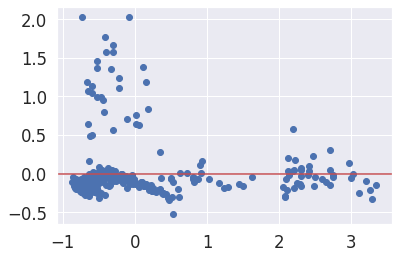

In [188]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(y_pred, residuals)
plt.show()

# References
We report here relevant references:
1. Curso de Regresión Lineal con Python y scikit-learn. (s. f.). http://platzi.com/cursos/regresion-lineal/. https://platzi.com/cursos/regresion-lineal/
2. Medical Cost Personal Datasets. (s. f.). Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/datasets/mirichoi0218/insurance